## Import Libraries

In [9]:
!pip install plotly

     |████████████████████████████████| 13.0 MB 5.7 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=08232d2ee2b81c423bff0ba47425f5a369ade11fe277da9abb8c3e531b2a856b
  Stored in directory: /Users/jhur/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
You should consider upgrading via the '/Applications/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
# Dependencies and Setup
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



## Read/Clean Data

In [2]:
# Read All Star csv
all_players = pd.read_csv('../../datasets/NBA_All_Stars_1996-2018.csv') 
all_players = all_players.rename(columns={'PLAYER':'Player'})
# all_stars = all_players.loc[all_players['Selected?'] == 1]
all_players.head()

,Year,Avg. Pace,Player,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?,Selected?
0,1996,90.1,Michael Jordan,CHI,1,40,40,35,30.9,5.8,...,0.5,1.7,56.4,1.2,0.004,33.6,19.8,10,1,1
1,1996,90.1,Shaquille O'Neal,LAL,3,40,41,28,26.2,13.2,...,3.1,3.1,55.7,0.0,0.003,30.4,18.4,4,1,1
2,1996,90.1,Latrell Sprewell,GSW,7,39,39,16,25.9,4.9,...,0.8,4.0,57.1,2.2,0.001,28.2,14.5,2,0,1
3,1996,90.1,Karl Malone,UTA,4,40,40,27,25.8,10.8,...,0.7,3.1,57.6,0.0,0.003,31.5,20.8,9,1,1
4,1996,90.1,Hakeem Olajuwon,HOU,1,37,41,28,24.1,9.4,...,2.2,3.7,54.8,0.1,0.003,32.2,16.3,11,1,1


In [3]:
# Read Salary csv
player_salary = pd.read_csv('../../datasets/nba_salaries.csv') 
player_salary.head()

,Rank,Team,Player,Position,Year,Salary,Inflation
0,1,Golden State Warriors,Stephen Curry,PG,2020,40231758,40231758
1,2,Oklahoma City Thunder,Chris Paul,PG,2020,38506482,38506482
2,3,Houston Rockets,Russell Westbrook,PG,2020,38506482,38506482
3,4,Washington Wizards,John Wall,PG,2020,38199000,38199000
4,5,Brooklyn Nets,Kevin Durant,SF,2020,38199000,38199000


In [4]:
all_data = pd.merge(all_players, player_salary, how='inner', on=['Player', 'Year'])
all_data.head()


,Year,Avg. Pace,Player,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,USG%,PIE,Prior ASG Appearances,AS Last Year?,Selected?,Rank,Team,Position,Salary,Inflation
0,2000,91.3,Jerry Stackhouse,DET,10,39,41,14,30.1,3.7,...,35.1,15.7,1,1,1,54,Detroit Pistons,SF,4781000,6971791
1,2000,91.3,Kobe Bryant,LAL,3,39,39,26,29.6,5.4,...,31.2,16.0,2,1,1,19,Los Angeles Lakers,SF,9000000,13124059
2,2000,91.3,Vince Carter,TOR,6,36,41,21,28.5,5.6,...,30.3,15.5,1,1,1,100,Toronto Raptors,G,2267000,3305804
3,2000,91.3,Allen Iverson,PHI,1,38,40,28,28.5,4.0,...,32.4,15.7,1,1,1,15,Philadelphia 76ers,SG,9000000,13124059
4,2000,91.3,Shaquille O'Neal,LAL,3,37,39,25,26.8,13.0,...,30.6,16.9,7,1,1,1,Los Angeles Lakers,C,17142000,24996958


## Create graphs

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


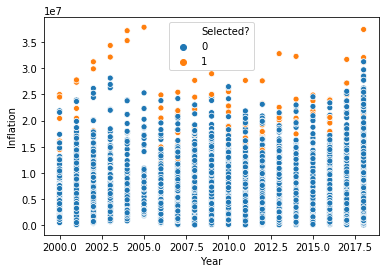

In [6]:
sns.scatterplot(y='Inflation', x='Year', hue = 'Selected?', data=all_data)

In [19]:

fig = go.Figure(data=go.Scatter(x=all_data['Year'],
                                y=all_data['Inflation'],
                                mode='markers',
                                marker_color=all_data['Selected?'],
                                text=all_data['Player'])) 

fig.update_traces(marker=dict(size=8,
                              line=dict(width=.5,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(title='All Stars vs Salary')
fig.show()

fig.write_html("plotly.html")
